1. SMOTE
2. AUROC to decide use SMOTE or not
3. feature engineering
4. feature scaling
5. apply machine learning model

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the data from the CSV file
train_data = pd.read_csv('./dataset/train.csv')
df_test = pd.read_csv('./dataset/test.csv')
df_train = train_data.drop('id', axis=1, inplace=False)
df_test = df_test.drop(['id'], axis=1)

df_train

,target,0,1,2,3,4,5,6,7,8,...,290,291,292,293,294,295,296,297,298,299
0,1.0,-1.067,-1.114,-0.616,0.376,1.090,0.467,-0.422,0.460,-0.443,...,0.220,-0.339,0.254,-0.179,0.352,0.125,0.347,0.436,0.958,-0.824
1,0.0,-0.831,0.271,1.716,1.096,1.731,-0.197,1.904,-0.265,0.557,...,-0.765,-0.735,-1.158,2.554,0.856,-1.506,0.462,-0.029,-1.932,-0.343
2,0.0,0.099,1.390,-0.732,-1.065,0.005,-0.081,-1.450,0.317,-0.624,...,-1.311,0.799,-1.001,1.544,0.575,-0.309,-0.339,-0.148,-0.646,0.725
3,1.0,-0.989,-0.916,-1.343,0.145,0.543,0.636,1.127,0.189,-0.118,...,-1.370,1.093,0.596,-0.589,-0.649,-0.163,-0.958,-1.081,0.805,3.401
4,0.0,0.811,-1.509,0.522,-0.360,-0.220,-0.959,0.334,-0.566,-0.656,...,-0.178,0.718,-1.017,1.249,-0.596,-0.445,1.751,1.442,-0.393,-0.643
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1.0,-0.068,-0.184,-1.153,0.610,0.414,1.557,-0.234,0.950,0.896,...,1.492,1.430,-0.333,-0.200,-1.073,0.797,1.980,1.191,1.032,-0.402
246,0.0,-0.234,-1.373,-2.050,-0.408,-0.255,0.784,0.986,-0.891,-0.268,...,-0.996,0.678,1.395,0.714,0.215,-0.537,-1.267,-1.021,0.747,0.128
247,0.0,-2.327,-1.834,-0.762,0.660,-0.858,-2.764,-0.539,-0.065,0.549,...,-1.237,-0.620,0.670,-2.010,0.438,1.972,-0.379,0.676,-1.220,-0.855
248,1.0,-0.451,-0.204,-0.762,0.261,0.022,-1.487,-1.122,0.141,0.369,...,0.729,0.411,2.366,-0.021,0.160,0.045,0.208,-2.117,-0.546,-0.093


counter_zero: 183
counter_one: 67


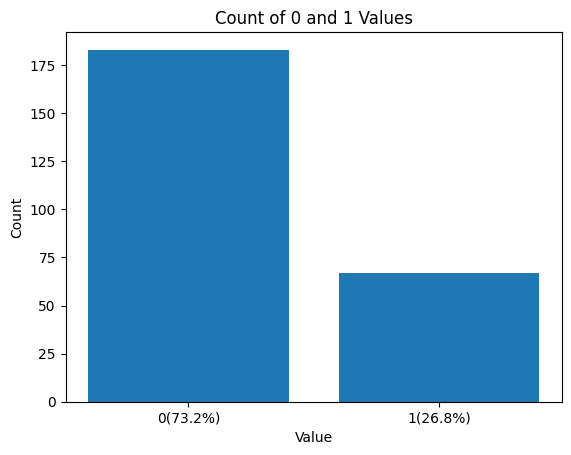

In [29]:
num_row = df_train.shape[0]

counter_zero = 0
counter_one = 0
for i in range(0, num_row):
    if df_train.iloc[i]['target'] == 0:
        counter_zero += 1
    elif df_train.iloc[i]['target'] == 1:
        counter_one += 1

print("counter_zero: " + str(counter_zero))
print("counter_one: " + str(counter_one))
total_counter = counter_zero + counter_one

plt.bar(['0' + '(' + str((counter_zero / total_counter) * 100) + '%)', '1' + '(' + str((counter_one / total_counter) * 100) + '%)'], [counter_zero, counter_one])
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Count of 0 and 1 Values')
plt.show()

In [30]:
# SMOTE (Synthetic Minority Oversampling Techniques)

X = df_train.drop('target', axis=1)
y = df_train['target']

# print class distribution before oversampling
print('Original dataset shape %s' % Counter(y))

# apply SMOTE oversampling
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

# Create a new DataFrame that contains both the features and the target variable
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# print class distribution after oversampling
print('Resampled dataset shape %s' % Counter(y_resampled))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test)[:,1]
auroc_original = roc_auc_score(y_test, y_pred_proba)

# AUROC of data that being SMOTE
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
clf_resampled = LogisticRegression()
clf_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_proba_resampled = clf_resampled.predict_proba(X_test_resampled)[:,1]
auroc_resampled = roc_auc_score(y_test_resampled, y_pred_proba_resampled)

print("AUROC on original data: %.3f" % auroc_original)
print("AUROC on resampled data: %.3f" % auroc_resampled)

Original dataset shape Counter({0.0: 183, 1.0: 67})
Resampled dataset shape Counter({1.0: 183, 0.0: 183})
AUROC on original data: 0.665
AUROC on resampled data: 0.950


In [31]:
# Feature Engineering

# Credits to https://medium.com/analytics-vidhya/kaggle-competition-dont-overfit-ii-74cf2d9deed5
def feature_engg(df, if_test = False):
    '''
    Perform Feature Engg in Basic Stats, Trigometrics, Hyperbolic and Exponential Function
    
    Parameters:
    df: Pass DataFrame (all features much be in numric values)
    if_test: If the DataFrame is test data or train data. Ig it is test data, put if_test=True
    
    Return:
    DataFrame with feature engineering appended
    '''
    
    if if_test:
        temp = df.drop(['id'], axis=1)
    elif not if_test and hasattr(df, 'id') and hasattr(df, 'target'):
        temp = df.drop(['id','target'], axis=1)
    else:
        temp = df
        
# Mean and Std FE
    df['mean'] = np.mean(temp, axis=1)
    df['std'] = np.std(temp, axis=1)
# Trigometric FE
    sin_temp = np.sin(temp)
    cos_temp = np.cos(temp)
    tan_temp = np.tan(temp)
    df['mean_sin'] = np.mean(sin_temp, axis=1)
    df['mean_cos'] = np.mean(cos_temp, axis=1)
    df['mean_tan'] = np.mean(tan_temp, axis=1)
# Hyperbolic FE
    sinh_temp = np.sinh(temp)
    cosh_temp = np.cosh(temp)
    tanh_temp = np.tanh(temp)
    df['mean_sinh'] = np.mean(sin_temp, axis=1)
    df['mean_cosh'] = np.mean(cos_temp, axis=1)
    df['mean_tanh'] = np.mean(tan_temp, axis=1)
# Exponents FE
    exp_temp = np.exp(temp)
    expm1_temp = np.expm1(temp)
    exp2_temp = np.exp2(temp)
    df['mean_exp'] = np.mean(exp_temp, axis=1)
    df['mean_expm1'] = np.mean(expm1_temp, axis=1)
    df['mean_exp2'] = np.mean(exp2_temp, axis=1)
# Polynomial FE
    # X**2
    df['mean_x2'] = np.mean(np.power(temp,2), axis=1)
    return df

df_fe = feature_engg(X_resampled)
df_test_fe = feature_engg(df_test)

In [32]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

# some values in your DataFrame are too large, possibly infinite or nan.
print(np.isinf(df_fe).sum().sum())
print(np.isnan(df_fe).sum().sum())

for col in df_fe.columns:
    col_median = df_fe[col].median()
    df_fe[col] = df_fe[col].replace([np.inf, -np.inf], col_median)
    df_fe[col] = df_fe[col].fillna(col_median)
    
for col in df_test_fe.columns:
    col_median = df_test_fe[col].median()
    df_test_fe[col] = df_test_fe[col].replace([np.inf, -np.inf], col_median)
    df_test_fe[col] = df_test_fe[col].fillna(col_median)


scaler = StandardScaler()
df_fe_std = scaler.fit_transform(df_fe)
df_test_fe_std = scaler.fit_transform(df_test_fe)

0
0


In [33]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

# df_resampled = pd.concat([X_resampled, y_resampled], axis=1)
target = df_resampled['target']

X_train, X_test, y_train, y_test = train_test_split(df_fe_std, target, test_size=0.2, random_state=42)

# KNN Classification
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Model Evaluation
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f" % accuracy)

Accuracy: 0.500


In [34]:
# Logistic Regression on train data set

X_train, X_test, y_train, y_test = train_test_split(df_fe_std, target, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

y_pred_test = logreg.predict(df_test_fe_std)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy in train data: %.3f" % accuracy)

y_true_test = pd.read_csv('./dataset/sample_submission.csv')['target']
accuracy = accuracy_score(y_true_test, y_pred_test)
print("Accuracy in test data: %.3f" % accuracy)

# create submission file
submission = pd.DataFrame({
    'id': np.arange(250, 250+len(y_pred_test)),
    'target': y_pred_test
})
submission.to_csv('submission.csv', index=False)
submission

Accuracy in train data: 0.851
Accuracy in test data: 0.488


,id,target
0,250,1.0
1,251,1.0
2,252,0.0
3,253,1.0
4,254,1.0
...,...,...
19745,19995,0.0
19746,19996,1.0
19747,19997,1.0
19748,19998,1.0
